# Data visualization with python - Final Assignment

### Description : It consists of various viuslization plots for analysis purposes. The assignment is a part of Data Science Specialization by IBM 

In [3]:
# import all the necessary libraries
import numpy as np  
import pandas as pd 
print('Imported succesfully!')

Imported succesfully!


In [47]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', delimiter= ',')

print(" Dataset downloaded and read!")
df

 Dataset downloaded and read!


,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [48]:
df

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt # import matplotlib and its scripting layer
import matplotlib.patches as patches
%matplotlib inline    
print('Done!')

Done!


Question 1: Use the artist layer of Matplotlib to replicate the bar chart below to visualize the 
    percentage of the respondents interest in the different data science topics surveyed.
    

In [50]:
df.sort_values(by=['Very interested'], inplace=True, ascending=False)
df.rename( columns={'Unnamed: 0': 'Field'}, inplace= True)
df_p = df[['Field']]
df_p= df_p.join((df[['Very interested','Somewhat interested','Not interested']]/2233)*100).round(2)
df_p.set_index('Field', inplace=True)
df_p

,Very interested,Somewhat interested,Not interested
Field,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


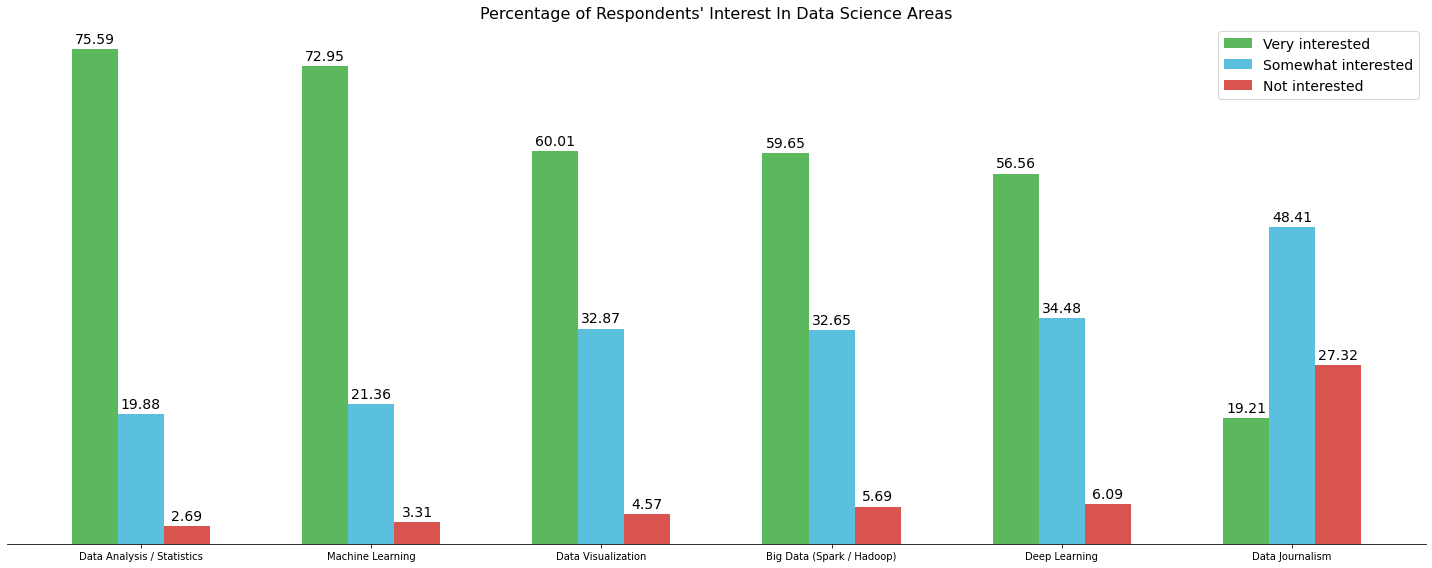

In [68]:
fields =['Data Analysis / Statistics','Machine Learning','Data Visualization','Big Data (Spark / Hadoop)','Deep Learning','Data Journalism']
very_int = df_p['Very interested']
some_int = df_p['Somewhat interested']
not_int = df_p['Not interested']

ar = np.arange(len(very_int))  
width = 0.2

fig, ax = plt.subplots(figsize=(20,8))
bars1 = ax.bar(ar - width, very_int, width, label='Very interested', color='#5cb85c')
bars2 = ax.bar(ar, some_int, width, label='Somewhat interested', color='#5bc0de')
bars3 = ax.bar(ar + width, not_int, width, label='Not interested', color='#d9534f')

ax.set_title("Percentage of Respondents' Interest In Data Science Areas", fontsize=16)
ax.set_xticks(ar)
plt.xticks( rotation = 'vertical')
ax.set_xticklabels((fields))
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14)


def autolabel(bars, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for bar in bars:
        height = bar.get_height().round(2)
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3), 
                    textcoords="offset points",
                    ha=ha[xpos], va='bottom', fontsize=14)


autolabel(bars1, "center")
autolabel(bars2, "center")
autolabel(bars3, "center")
fig.tight_layout()
plt.show()

In [63]:
file =  'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip'
df_sf = pd.read_csv(file)
df_sf.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [64]:
df_sf_n = df_sf.groupby(["PdDistrict"]).count().reset_index()
df_sf_n.drop(df_sf_n.columns.difference(['PdDistrict','IncidntNum']), 1, inplace=True)
df_sf_n.rename(columns={'PdDistrict':'Neighborhood','IncidntNum':'Count'}, inplace=True)
df_sf_n

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 